In [70]:
# https://geoffboeing.com/2016/11/osmnx-python-street-networks/
# https://github.com/gboeing/osmnx-examples/blob/v0.13.0/notebooks/02-routing-speed-time.ipynb
# https://wiki.openstreetmap.org/wiki/Map_features#Transportation
# https://www.cl.cam.ac.uk/teaching/1415/L109/l109-tutorial_2015.pdf
import networkx as nx
import pandas as pd
import osmnx as ox
import geopandas as gpd
ox.config(use_cache=True, log_console=True)

C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
place = 'Oaxaca de Juarez'
G = ox.graph_from_place(place, network_type='drive')
area_raw = ox.geometries.geometries_from_place(place, tags={"public_transport": True})

In [72]:
area_raw.to_csv('oax_pub.csv', index = None)
area_raw


C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unique_id,osmid,element_type,bench,bus,highway,public_transport,shelter,geometry,source,...,building,phone,name:en,name:fr,nodes,building:levels,area,operator,railway,train
0,node/1518940751,1518940751,node,no,yes,bus_stop,platform,no,POINT (-96.72781 17.05549),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/3201063667,3201063667,node,no,yes,bus_stop,platform,no,POINT (-96.72647 17.08379),local_knowledge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/3201063968,3201063968,node,no,yes,bus_stop,platform,no,POINT (-96.72077 17.08407),local_knowledge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node/3201063969,3201063969,node,no,yes,bus_stop,platform,no,POINT (-96.72204 17.08441),local_knowledge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node/3201064965,3201064965,node,no,yes,bus_stop,platform,no,POINT (-96.72367 17.08337),local_knowledge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,way/155171792,155171792,way,NaN,yes,NaN,station,NaN,"POLYGON ((-96.71711 17.07078, -96.71720 17.069...",NaN,...,yes,NaN,NaN,NaN,"[1675928563, 1675928564, 1675928565, 167592856...",2,NaN,NaN,NaN,NaN
147,way/286810479,286810479,way,NaN,yes,NaN,station,NaN,"POLYGON ((-96.71006 17.11296, -96.70997 17.112...",NaN,...,yes,NaN,NaN,NaN,"[2904829197, 2904829198, 2904829199, 290482920...",NaN,NaN,NaN,NaN,NaN
148,way/479393060,479393060,way,NaN,yes,NaN,station,NaN,"POLYGON ((-96.73486 17.06143, -96.73483 17.061...",NaN,...,NaN,NaN,NaN,NaN,"[4725076843, 4725076842, 4725076841, 472507684...",NaN,yes,AU and Sur,NaN,NaN
149,way/815524316,815524316,way,NaN,NaN,NaN,station,NaN,"POLYGON ((-96.73701 17.06736, -96.73692 17.067...",NaN,...,yes,NaN,NaN,NaN,"[7616544280, 7616544281, 7616544282, 761654428...",NaN,NaN,NaN,station,yes


In [73]:
col = ['source', 'building', 'phone', 'name:en', 'name:fr', 'nodes', 'building:levels', 'area', 'operator', 'railway',
       'train','name', 'wheelchair', 'addr:street', 'amenity']

area = (area_raw
        .drop(col, axis =1)
        .iloc[0:-6 ,:]
        .assign(Center_point = lambda df: df.geometry.centroid, 
               lat = lambda df: df.Center_point.map(lambda p: p.y),
               lng = lambda df: df.Center_point.map(lambda p: p.x)
               )
       )

area.head()

C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  import sys


,unique_id,osmid,element_type,bench,bus,highway,public_transport,shelter,geometry,Center_point,lat,lng
0,node/1518940751,1518940751,node,no,yes,bus_stop,platform,no,POINT (-96.72781 17.05549),POINT (-96.72781 17.05549),17.055487,-96.727809
1,node/3201063667,3201063667,node,no,yes,bus_stop,platform,no,POINT (-96.72647 17.08379),POINT (-96.72647 17.08379),17.083794,-96.726470
2,node/3201063968,3201063968,node,no,yes,bus_stop,platform,no,POINT (-96.72077 17.08407),POINT (-96.72077 17.08407),17.084071,-96.720769
3,node/3201063969,3201063969,node,no,yes,bus_stop,platform,no,POINT (-96.72204 17.08441),POINT (-96.72204 17.08441),17.084406,-96.722041
4,node/3201064965,3201064965,node,no,yes,bus_stop,platform,no,POINT (-96.72367 17.08337),POINT (-96.72367 17.08337),17.083371,-96.723670


In [74]:
area.to_csv('oax_pub_clean.csv', index = None)
area.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   unique_id         145 non-null    object  
 1   osmid             145 non-null    int64   
 2   element_type      145 non-null    object  
 3   bench             138 non-null    object  
 4   bus               145 non-null    object  
 5   highway           144 non-null    object  
 6   public_transport  145 non-null    object  
 7   shelter           138 non-null    object  
 8   geometry          145 non-null    geometry
 9   Center_point      145 non-null    geometry
 10  lat               145 non-null    float64 
 11  lng               145 non-null    float64 
dtypes: float64(2), geometry(2), int64(1), object(7)
memory usage: 14.7+ KB


C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
geo = 'Toluca'
R = ox.graph_from_place(geo, network_type='drive')
tol_raw = ox.geometries.geometries_from_place(geo, tags={"public_transport": True})
tol_raw

C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unique_id,osmid,element_type,public_transport,geometry,source,bus,construction:railway,highway,name,...,network,operator,shelter,nodes,covered,building,layer,level,railway,train
0,node/4062210341,4062210341,node,platform,POINT (-99.65936 19.27893),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/4226095800,4226095800,node,stop_position,POINT (-99.63073 19.31968),survey 24 Mayo 2016,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/4593459558,4593459558,node,platform,POINT (-99.64176 19.27043),NaN,yes,station,bus_stop,Pino Suárez - Terminal de Autobuses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node/5299957221,5299957221,node,platform,POINT (-99.66119 19.26668),NaN,yes,NaN,bus_stop,Taxis (Toluca-Tejupilco),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node/5793242394,5793242394,node,platform,POINT (-99.69301 19.28854),NaN,yes,NaN,bus_stop,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,node/5793242395,5793242395,node,platform,POINT (-99.68862 19.28817),NaN,yes,NaN,bus_stop,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,node/5793242396,5793242396,node,platform,POINT (-99.67828 19.28810),NaN,yes,NaN,bus_stop,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,node/6058459653,6058459653,node,platform,POINT (-99.67574 19.28339),NaN,yes,NaN,bus_stop,Potrobus,...,Metepec,UAEMex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,node/6058459654,6058459654,node,platform,POINT (-99.67609 19.28270),NaN,yes,NaN,bus_stop,Potrobus,...,Metepec,UAEMex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,node/6058459655,6058459655,node,platform,POINT (-99.67662 19.28156),NaN,yes,NaN,bus_stop,Potrobus,...,Metepec,UAEMex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
tol = (tol_raw
       .assign(Center_point = lambda df: df.geometry.centroid,
               lat = lambda df: df.Center_point.map(lambda p: p.y),
               lng = lambda df: df.Center_point.map(lambda p: p.x)
              )
      )
#tol['lat'] = tol.Center_point.map(lambda p: p.y)
#tol['lng'] = tol.Center_point.map(lambda p: p.x)
tol

C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,unique_id,osmid,element_type,public_transport,geometry,source,bus,construction:railway,highway,name,...,nodes,covered,building,layer,level,railway,train,Center_point,lat,lng
0,node/4062210341,4062210341,node,platform,POINT (-99.65936 19.27893),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-99.65936 19.27893),19.278931,-99.659362
1,node/4226095800,4226095800,node,stop_position,POINT (-99.63073 19.31968),survey 24 Mayo 2016,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-99.63073 19.31968),19.319676,-99.630729
2,node/4593459558,4593459558,node,platform,POINT (-99.64176 19.27043),NaN,yes,station,bus_stop,Pino Suárez - Terminal de Autobuses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-99.64176 19.27043),19.270432,-99.641763
3,node/5299957221,5299957221,node,platform,POINT (-99.66119 19.26668),NaN,yes,NaN,bus_stop,Taxis (Toluca-Tejupilco),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-99.66119 19.26668),19.266685,-99.661192
4,node/5793242394,5793242394,node,platform,POINT (-99.69301 19.28854),NaN,yes,NaN,bus_stop,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-99.69301 19.28854),19.288535,-99.693012
5,node/5793242395,5793242395,node,platform,POINT (-99.68862 19.28817),NaN,yes,NaN,bus_stop,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-99.68862 19.28817),19.288165,-99.688620
6,node/5793242396,5793242396,node,platform,POINT (-99.67828 19.28810),NaN,yes,NaN,bus_stop,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-99.67828 19.28810),19.288100,-99.678283
7,node/6058459653,6058459653,node,platform,POINT (-99.67574 19.28339),NaN,yes,NaN,bus_stop,Potrobus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-99.67574 19.28339),19.283388,-99.675739
8,node/6058459654,6058459654,node,platform,POINT (-99.67609 19.28270),NaN,yes,NaN,bus_stop,Potrobus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-99.67609 19.28270),19.282701,-99.676090
9,node/6058459655,6058459655,node,platform,POINT (-99.67662 19.28156),NaN,yes,NaN,bus_stop,Potrobus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-99.67662 19.28156),19.281556,-99.676620


In [79]:
tol.to_csv('tol_pub_clean.csv', index = None)
tol.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   unique_id                      36 non-null     object  
 1   osmid                          36 non-null     int64   
 2   element_type                   36 non-null     object  
 3   public_transport               36 non-null     object  
 4   geometry                       36 non-null     geometry
 5   source                         1 non-null      object  
 6   bus                            19 non-null     object  
 7   construction:railway           1 non-null      object  
 8   highway                        31 non-null     object  
 9   name                           17 non-null     object  
 10  bench                          2 non-null      object  
 11  passenger_information_display  3 non-null      object  
 12  lit                           

In [6]:
# convert graph to geodataframes
gdf_edges = ox.graph_to_gdfs(G, nodes=False)

# list of lats and lngs
lngs = gdf_edges.head().centroid.map(lambda x: x.coords[0][0])
lats = gdf_edges.head().centroid.map(lambda x: x.coords[0][1])

# the lat, lng at the spatial center of the graph
lng, lat = gdf_edges.unary_union.centroid.coords[0]
center_point = lat, lng

C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """
C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [7]:
# find the nearest node to some point
center_node = ox.get_nearest_node(G, center_point)

C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:

# find the nearest nodes to a set of points
# optionally specify `method` use use a kdtree or balltree index
nearest_nodes = ox.get_nearest_nodes(G, lngs, lats, method='balltree')

In [9]:
# find the nearest edge to some point
nearest_edge = ox.get_nearest_edge(G, center_point)

C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# find the nearest edges to some set of points
# optionally specify `method` use use a kdtree or balltree index
nearest_edges = ox.get_nearest_edges(G, lngs, lats)

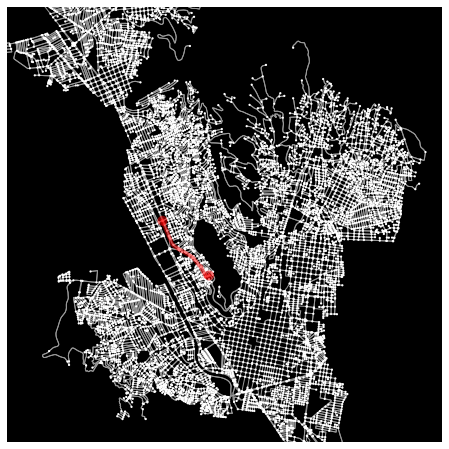

In [11]:
# find the shortest path (by distance) between these nodes then plot it
orig = list(G)[0]
dest = list(G)[-1]
pt1 = ox.graph_to_gdfs(G, edges=False).unary_union.centroid
bbox1 = ox.utils_geo.bbox_from_point((pt1.y, pt1.x), dist=5000)
route = nx.shortest_path(G, orig, dest, weight='length')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=4, node_size=5, bgcolor='k', bbox= bbox1)

In [12]:
print(pt1)
df = ox.graph_to_gdfs(G, edges=False)
df.info()

C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


POINT (-96.73167937077675 17.0852100446095)
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9554 entries, 291052324 to 8650970215
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   y         9554 non-null   float64 
 1   x         9554 non-null   float64 
 2   osmid     9554 non-null   int64   
 3   highway   179 non-null    object  
 4   geometry  9554 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 447.8+ KB


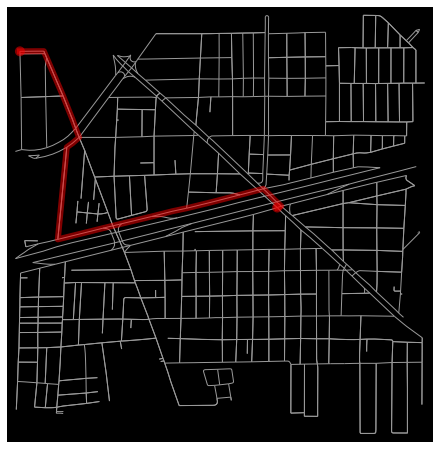

In [13]:
G2 = ox.graph_from_address('Boulevard Solidaridad las Torres, Toluca, State of Mexico, 52169, Mexico', dist=800, network_type='drive')
origin = (19.2703, -99.6413)
destination = (19.28533, -99.65208)
origin_node = ox.get_nearest_node(G2, origin)
destination_node = ox.get_nearest_node(G2, destination)
route = nx.shortest_path(G2, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G2, route, route_linewidth=6, node_size=0, bgcolor='k')

C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


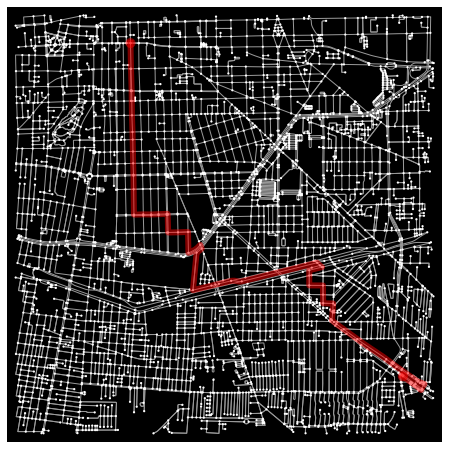

In [14]:
location_point = (19.274698,-99.646505)
G2 = ox.graph_from_point(location_point, dist=2000, clean_periphery=False)
origin = (19.261491,-99.630436) # Pino suarez
destination = (19.290400, -99.655212) # Hidalgo
origin_node = ox.get_nearest_node(G2, origin)
destination_node = ox.get_nearest_node(G2, destination)
route = nx.shortest_path(G2, origin_node, destination_node, weight = 'travel_time')
fig, ax = ox.plot_graph_route(G2, route, route_linewidth=6, node_size=5, bgcolor='k')

In [15]:
location_point = (19.274698,-99.646505)
G3 = ox.graph_from_point(location_point, dist=2000, clean_periphery=False )

C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# impute speed on all edges missing data
G2 = ox.add_edge_speeds(G2)

# calculate travel time (seconds) for all edges
G2 = ox.add_edge_travel_times(G2)

In [17]:
# see mean speed/time values by road type
edges = ox.graph_to_gdfs(G2, nodes=False)
edges['highway'] = edges['highway'].astype(str)
edges.groupby('highway')[['length', 'speed_kph', 'travel_time']].mean().round(1)

,length,speed_kph,travel_time
highway,,,
"['footway', 'pedestrian']",138.1,45.0,11.0
"['residential', 'footway']",155.0,40.0,13.9
"['residential', 'path']",337.7,40.0,30.4
"['residential', 'pedestrian']",85.7,40.0,7.7
"['service', 'footway']",49.4,40.0,4.4
"['service', 'living_street']",178.1,40.0,16.0
"['service', 'path']",109.1,40.0,9.8
"['service', 'residential']",154.8,40.0,14.0
"['service', 'secondary']",28.0,40.0,2.5


In [18]:
# # same thing again, but this time pass in a few default speed values (km/hour)
# # to fill in edges with missing `maxspeed` from OSM
# hwy_speeds = {'residential': 35,
#               'secondary': 50,
#               'tertiary': 60}
# G = ox.add_edge_speeds(G, hwy_speeds)
# G = ox.add_edge_travel_times(G)

C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# calculate two routes by minimizing travel distance vs travel time

route1 = nx.shortest_path(G2,origin_node, destination_node, weight='length')
route2 = nx.shortest_path(G2,origin_node, destination_node,  weight='travel_time')


In [20]:

# compare the two routes
route1_length = int(sum(ox.utils_graph.get_route_edge_attributes(G2, route1, 'length')))
route2_length = int(sum(ox.utils_graph.get_route_edge_attributes(G2, route2, 'length')))
route1_time = int(sum(ox.utils_graph.get_route_edge_attributes(G2, route1, 'travel_time')))
route2_time = int(sum(ox.utils_graph.get_route_edge_attributes(G2, route2, 'travel_time')))
print('Route 1 is', route1_length, 'meters and takes', route1_time, 'seconds.')
print('Route 2 is', route2_length, 'meters and takes', route2_time, 'seconds.')

Route 1 is 5051 meters and takes 404 seconds.
Route 2 is 5340 meters and takes 352 seconds.


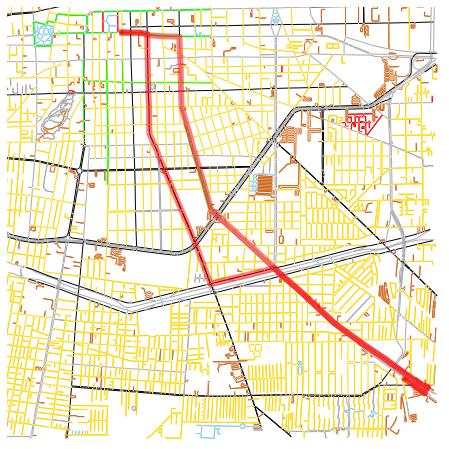

In [21]:
pt = ox.graph_to_gdfs(G2, edges=False).unary_union.centroid
bbox = ox.utils_geo.bbox_from_point((pt.y, pt.x), dist=2000)


ec = ['skyblue' if data['highway']=='footway' 
      else 'gold' if data['highway']=='residential' 
      else 'lime' if data['highway']=='cycleway' 
      else 'chocolate' if data['highway']=='service' 
      else 'violet' if data['highway']=='living street' 
      else 'black' if data['highway']=='secondary'
      else 'red' if data['highway']=='pedestrian'
      else 'darkgrey' for u, v, key, data in G2.edges(keys=True, data=True)]

# plot the routes
fig , ax= ox.plot_graph_routes(G2, [route1,route2] , save = True, route_color= ['r', 'b'], route_linewidth=6, node_size=1, bgcolor='w',orig_dest_size=10, bbox= bbox, edge_color = ec )


In [22]:
# G = ox.graph_from_place('Santa Monica, California', network_type='walk')
# basic_stats = ox.basic_stats(G)
# print(basic_stats['circuity_avg'])
# extended_stats = ox.extended_stats(G, bc=True)
# print(extended_stats['betweenness_centrality_avg'])


C:\Users\DiDi\miniconda3\envs\dev\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
